In [64]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
aqi_2015_df = pd.read_csv("Resources/aqi_2015.csv")
aqi_2016_df = pd.read_csv("Resources/aqi_2016.csv")
aqi_2017_df = pd.read_csv("Resources/aqi_2017.csv")
aqi_2018_df = pd.read_csv("Resources/aqi_2018.csv")
aqi_2019_df = pd.read_csv("Resources/aqi_2019.csv")
aqi_2020_df = pd.read_csv("Resources/aqi_2020.csv")

aqi_2015_df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2015,264,230,33,1,0,0,0,129,53,38,0,0,189,0,75,0
1,Alabama,Clay,2015,112,101,11,0,0,0,0,91,50,32,0,0,0,0,112,0
2,Alabama,Colbert,2015,280,251,29,0,0,0,0,73,51,36,0,0,195,0,85,0
3,Alabama,DeKalb,2015,363,319,43,1,0,0,0,101,52,37,0,0,307,0,56,0
4,Alabama,Elmore,2015,233,223,9,1,0,0,0,115,47,35,0,0,233,0,0,0


In [66]:
# A L E X 
# QUESTION 1 - NUMBER OF GOOD DAYS 
#--------------------------------------------------

#Create DF for each year's data
# 2015 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2015_df = aqi_2015_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2016 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2016_df = aqi_2016_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2017 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2017_df = aqi_2017_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2018 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2018_df = aqi_2018_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2019 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2019_df = aqi_2019_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2020 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2020_df = aqi_2020_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

GoodDays_2020_df.head()

,State,County,Year,Days with AQI,Good Days,Unhealthy Days
0,Alabama,Baldwin,2020,168,159,0
1,Alabama,Clay,2020,58,54,0
2,Alabama,DeKalb,2020,242,234,0
3,Alabama,Elmore,2020,149,149,0
4,Alabama,Etowah,2020,169,161,0


In [67]:
#Calculate percentage of good days out of total days with aqi-
GoodDays_2015_df['Percent of Good Days'] = (GoodDays_2015_df['Good Days'] / GoodDays_2015_df['Days with AQI']) * 100
GoodDays_2016_df['Percent of Good Days'] = (GoodDays_2016_df['Good Days'] / GoodDays_2016_df['Days with AQI']) * 100
GoodDays_2017_df['Percent of Good Days'] = (GoodDays_2017_df['Good Days'] / GoodDays_2017_df['Days with AQI']) * 100
GoodDays_2018_df['Percent of Good Days'] = (GoodDays_2018_df['Good Days'] / GoodDays_2018_df['Days with AQI']) * 100
GoodDays_2019_df['Percent of Good Days'] = (GoodDays_2019_df['Good Days'] / GoodDays_2019_df['Days with AQI']) * 100
GoodDays_2020_df['Percent of Good Days'] = (GoodDays_2020_df['Good Days'] / GoodDays_2020_df['Days with AQI']) * 100


C:\Users\alexz\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alexz\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexz\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [68]:
#----------------------------------------------------------------------
#Find the Average Percent for each year
avg_pct_2015= GoodDays_2015_df['Percent of Good Days'].mean()
avg_pct_2016= GoodDays_2016_df['Percent of Good Days'].mean()
avg_pct_2017= GoodDays_2017_df['Percent of Good Days'].mean()
avg_pct_2018= GoodDays_2018_df['Percent of Good Days'].mean()
avg_pct_2019= GoodDays_2019_df['Percent of Good Days'].mean()
avg_pct_2020= GoodDays_2020_df['Percent of Good Days'].mean()


#Create new Dictionary that includes these calculations
avg_pct_by_year_dict = {"Average Percent 2015" : [avg_pct_2015],
                   "Average Percent 2016" : [avg_pct_2016],
                   "Average Percent 2017" : [avg_pct_2017],
                   "Average Percent 2018" : [avg_pct_2018],
                   "Average Percent 2019" : [avg_pct_2019],
                   "Average Percent 2020" : [avg_pct_2020]}

#Turn dictionary into new DF
GoodDay_pct_df = pd.DataFrame(avg_pct_by_year_dict)
GoodDay_pct_df.head()


,Average Percent 2015,Average Percent 2016,Average Percent 2017,Average Percent 2018,Average Percent 2019,Average Percent 2020
0,80.685607,83.375436,82.152143,81.28011,84.658307,88.191122


<IPython.core.display.Javascript object>


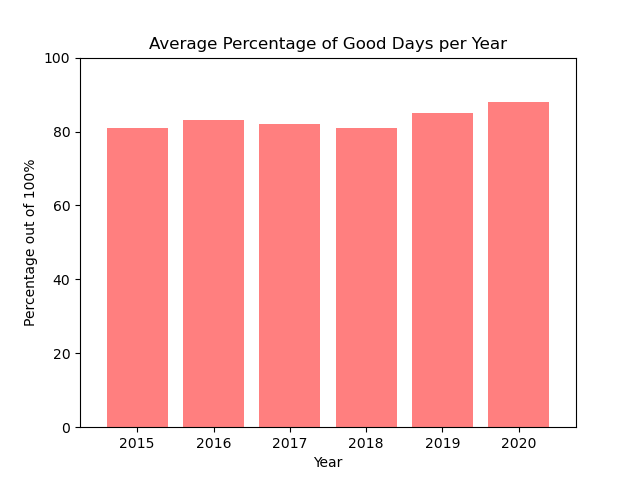

Text(0, 0.5, 'Percentage out of 100%')

In [141]:
#Create Bar Chart of Average Percents
# Create an array that contains the percentage of each year
percentages = [81, 83, 82, 81, 85, 88]
x_axis = np.arange(len(percentages))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, percentages, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2015", "2016", "2017", "2018", "2019", "2020"])

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(percentages)+12)

# Give our chart some labels and a tile
plt.title("Average Percentage of Good Days per Year")
plt.xlabel("Year")
plt.ylabel("Percentage out of 100%")

In [206]:
# Comparing the top 5 most populous states
#Group the DF by state and find the average percentage of that state
pctXstate_2015 = GoodDays_2015_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2015_df = pd.DataFrame(pctXstate_2015)

pctXstate_2016 = GoodDays_2016_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2016_df = pd.DataFrame(pctXstate_2016)

pctXstate_2017 = GoodDays_2017_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2017_df = pd.DataFrame(pctXstate_2017)

pctXstate_2018 = GoodDays_2018_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2018_df = pd.DataFrame(pctXstate_2018)

pctXstate_2019 = GoodDays_2019_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2019_df = pd.DataFrame(pctXstate_2019)

pctXstate_2020 = GoodDays_2020_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2020_df = pd.DataFrame(pctXstate_2020)

#print(pctXstate_2019_df)

<IPython.core.display.Javascript object>


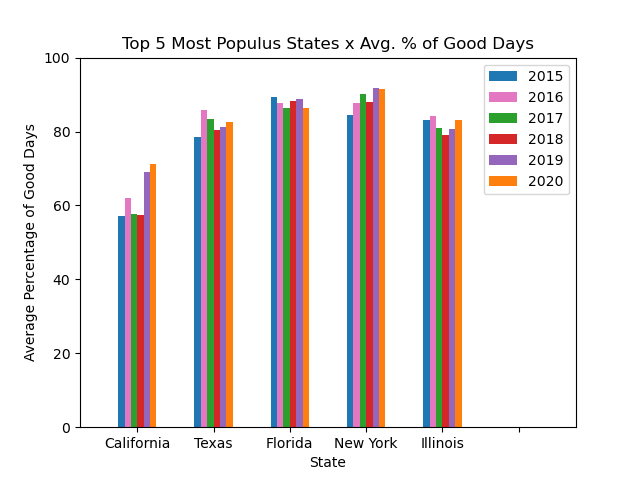

([<matplotlib.axis.XTick at 0x1c179be9908>,
 [Text(0, 0, 'California'),
  Text(0, 0, 'Texas'),
  Text(0, 0, 'Florida'),
  Text(0, 0, 'New York'),
  Text(0, 0, 'Illinois')])

In [203]:
stateXpct_plot = pd.DataFrame({
    "2015" : [57.20, 78.60, 89.21, 84.38, 83.24],
    "2016" : [61.95, 85.81, 87.84, 87.84, 84.32],
    "2017" : [57.56, 83.39, 86.45, 90.02, 80.83],
    "2018" : [57.53, 80.51, 88.28, 88.02, 79.17],
    "2019" : [69.16, 81.13, 88.74, 91.89, 80.59],
    "2020" : [71.32, 82.62, 86.32, 91.39, 83.23]},
    index=["California", "Texas", "Florida", "New York", "Illinois"])


stateXpct_plot.plot(kind="bar", color = ['tab:blue','tab:pink','tab:green', 'tab:red', 'tab:purple', 'tab:orange'] )
plt.title("Top 5 Most Populus States x Avg. % of Good Days")
plt.xlabel("State")
plt.ylabel("Average Percentage of Good Days")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(percentages)+12)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["California", "Texas", "Florida", "New York", "Illinois"],  rotation="horizontal")


In [104]:
## Testing with Horizontal Bar Chart

#Create a dataframe 
#df = pd.DataFrame({'percentages': [81, 83, 82, 81, 85, 88]},
#                  index=['2015', '2016', '2017', '2018', '2019', '2020']) 
                   
#Plot grouped horizontal bar chart 
#df.plot.barh(title="Average Percentage of Good Days per Year", 
#             color={"coral"}) 

#Set up other labels to include
#plt.xlabel("Percentage out of 100%")
#plt.ylabel("Year")

# Sets the y limits of the current chart
#plt.xlim(0, max(percentages)+12)

# Sets the x limits of the current chart
#plt.ylim(-0.75, len(x_axis)-0.25)




In [106]:
##SCRATCH 

#ALCounty_2020_df = Alabama_2020_df.loc[Alabama_2020_df["County"] == "Jefferson",:]
#Calculate percentage of good days out of total days with aqi-
#GoodDays_2020_df['Percent of Good Days'] = (GoodDays_2020_df['Good Days'] / GoodDays_2020_df['Days with AQI']) * 100
#GoodDays_2020_df.head()


#GoodDays_2020_df.groupby('State')["Good Days"].sum()
#California_2020_df = GoodDays_2020_df.loc[GoodDays_2020_df["State"] == "California":]
#California_2020_df


#GoodDays_2020_df.groupby('State')["Good Days"].sum()
#California_2020_df = GoodDays_2020_df.loc[GoodDays_2020_df["State"] == "California", ,:]
#California_2020_df



In [ ]:
##Scratch 2

#the top 5 most populus states are California, Texas, Florida, New York, & Illinois
#Get the average amounts of those states and create a new df with them

# States
#states = ['California', 'Texas', 'Florida', 'New York', 'Illinois'] 
  
# list of percents 
#avg_pcts2015 = [57.20, 78.60, 89.21, 84.38, 83.24] 
#avg_pcts2016 = [61.95, 85.81, 87.84, 87.84, 84.32] 
#avg_pcts2017 = [57.56, 83.39, 86.45, 90.02, 80.83] 
#avg_pcts2018 = [57.53, 80.51, 88.28, 88.02, 79.17] 
#avg_pcts2019 = [69.16, 81.13, 88.74, 91.89, 80.59] 
#avg_pcts2020 = [71.32, 82.62, 86.32, 91.39, 83.23] 
  
# Create DF with both lists, with columns specified 
#top5_state_2015_df = pd.DataFrame(list(zip(states, avg_pcts2015)), 
           #    columns =['State', 'Percent of Good Days']) 

#top5_state_2016_df = pd.DataFrame(list(zip(states, avg_pcts2016)), 
             #  columns =['State', 'Percent of Good Days']) 

#top5_state_2017_df = pd.DataFrame(list(zip(states, avg_pcts2017)), 
              # columns =['State', 'Percent of Good Days']) 

#top5_state_2018_df = pd.DataFrame(list(zip(states, avg_pcts2018)), 
              # columns =['State', 'Percent of Good Days']) 

#top5_state_2019_df = pd.DataFrame(list(zip(states, avg_pcts2019)), 
              # columns =['State', 'Percent of Good Days']) 

#top5_state_2020_df = pd.DataFrame(list(zip(states, avg_pcts2020)), 
              # columns =['State', 'Percent of Good Days']) 
